# Imports for Python libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn
from torch import optim

# Set up the mini-batch size

In [2]:
print("Edit code here to change the batch size.")
mini_batch_size = 6000

Edit code here to change the batch size.


# Download the dataset, pre-process, and divide into mini-batches

In [3]:
### Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

### Download and load the training data
trainset = datasets.MNIST('/kaggle/input/cs-361-mnist-data/MNIST_data', download=False, train=True, transform=transform)
valset = datasets.MNIST('/kaggle/input/cs-361-mnist-data/MNIST_data', download=False, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=mini_batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=mini_batch_size, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([6000, 1, 28, 28])
torch.Size([6000])


# Explore the processed data

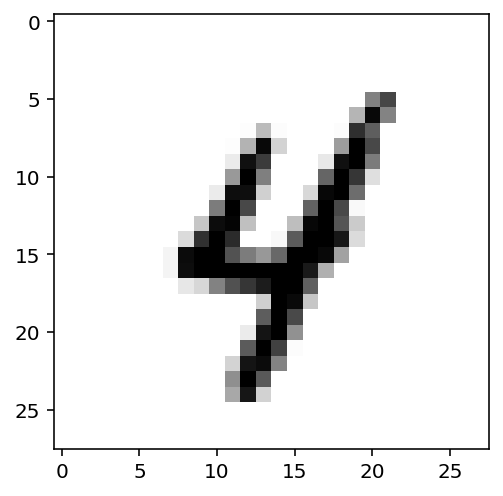

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r'); # Change the index of images[] to get different numbers

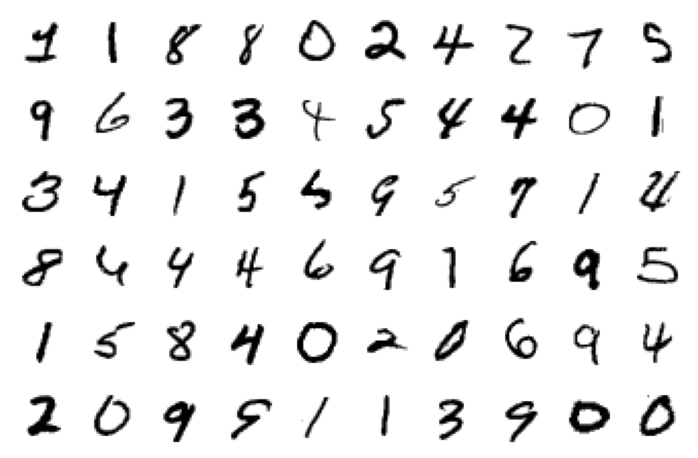

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Set up the neural network

In [6]:
### Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

### Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


# Set up the optimization model

In [7]:
print("Edit code here to change the optimization model.")
optimizer = optim.Adam(model.parameters(), lr=0.003)

Edit code here to change the optimization model.


# Set up the loss function to optimize over

In [8]:
time0 = time()
epochs = 15
criterion = nn.NLLLoss() # Negative log likelihood loss function is used
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # Model spits out the probability of image belonging to different classes
loss = criterion(logps, labels)

# Train the neural network

In [9]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.7282949209213256
Epoch 1 - Training loss: 0.6979433119297027
Epoch 2 - Training loss: 0.45702183842658994
Epoch 3 - Training loss: 0.38425455093383787
Epoch 4 - Training loss: 0.34174167215824125
Epoch 5 - Training loss: 0.3179850518703461
Epoch 6 - Training loss: 0.2995282053947449
Epoch 7 - Training loss: 0.2846210390329361
Epoch 8 - Training loss: 0.2690752625465393
Epoch 9 - Training loss: 0.2566706046462059
Epoch 10 - Training loss: 0.24274004697799684
Epoch 11 - Training loss: 0.2298830568790436
Epoch 12 - Training loss: 0.2214847594499588
Epoch 13 - Training loss: 0.20825285613536834
Epoch 14 - Training loss: 0.1972189277410507

Training Time (in minutes) = 2.7123873154322307


# Evaluate the trained neural network

In [10]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9421


# Predict using the trained neural network

In [11]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.'''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


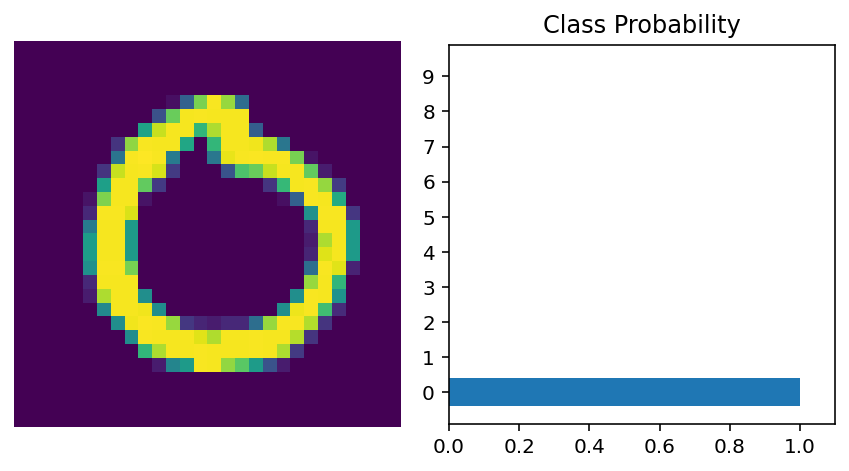

In [12]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)